In [97]:
import pandas as pd
import matplotlib.pyplot as plt
#imported the below for inclusing "Note:" in the diag
from pylab import *
#%matplotlib auto

In [2]:
csvpath1='city_data.csv'
csvpath2='ride_data.csv'
rawfile_city=pd.read_csv(csvpath1)
rawfile_city.head(3)

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban


In [3]:
rawfile_ride=pd.read_csv(csvpath2)
rawfile_ride.head(3)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587


In [4]:
ride_city_filemerge = pd.merge(rawfile_city, rawfile_ride, on="city", how="outer")
ride_city_filemerge.head(3)

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736


Text(0.95,0.6,'NOTE: Circle size correlates with driver count per city')

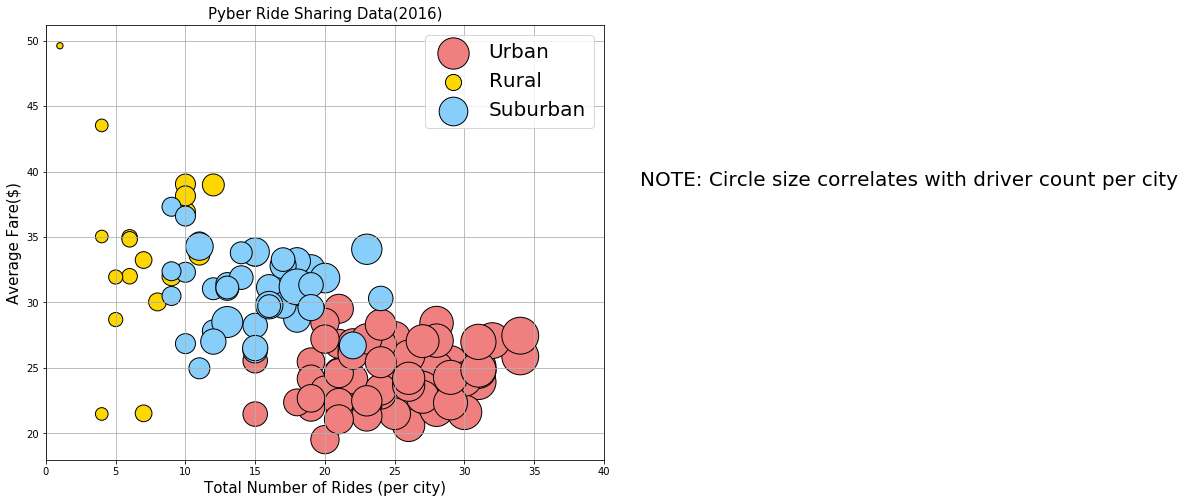

In [113]:
plt.figure(figsize=(10,8))
urban_city=ride_city_filemerge.loc[ride_city_filemerge['type']=='Urban']

urban_city_gp=urban_city.groupby(['city'])
urban_city_gpdf=pd.DataFrame({"Average Fare":urban_city_gp['fare'].mean(),
                            "Total rides per city":urban_city_gp['ride_id'].count()})
plt.scatter(x=urban_city_gpdf["Total rides per city"],y=urban_city_gpdf["Average Fare"],
            s=urban_city_gp["driver_count"].value_counts()*40,color='lightcoral',edgecolors="black",label ='Urban')
    

        
##################
rural_city=ride_city_filemerge.loc[ride_city_filemerge['type']=='Rural']

rural_city_gp=rural_city.groupby(['city'])
rural_city_gpdf=pd.DataFrame({"Average Fare":rural_city_gp['fare'].mean(),
                            "Total rides per city":rural_city_gp['ride_id'].count()})
plt.scatter(x=rural_city_gpdf["Total rides per city"],y=rural_city_gpdf["Average Fare"],
            s=rural_city_gp["driver_count"].value_counts()*40,color='Gold',edgecolors="black",label ='Rural')
    
    
###################    
sburban_city=ride_city_filemerge.loc[ride_city_filemerge['type']=='Suburban']

sburban_city_gp=sburban_city.groupby(['city'])
sburban_city_gpdf=pd.DataFrame({"Average Fare":sburban_city_gp['fare'].mean(),
                            "Total rides per city":sburban_city_gp['ride_id'].count()})
plt.scatter(x=sburban_city_gpdf["Total rides per city"],y=sburban_city_gpdf["Average Fare"],
            s=sburban_city_gp["driver_count"].value_counts()*40,color='lightskyblue',edgecolors="black",label ='Suburban')
    


plt.xlim(0,40)
plt.grid()
plt.xlabel("Total Number of Rides (per city)",fontsize=15)
plt.ylabel("Average Fare($)", fontsize=15)
plt.title("Pyber Ride Sharing Data(2016)", fontsize=15)
plt.legend(prop={'size': 20})
figtext(.95,.6,"NOTE: Circle size correlates with driver count per city", rotation='horizontal',fontsize=20)



In [83]:
#% of Total Fares by City Type

total_fare=ride_city_filemerge.groupby('type')
total_fare_df=pd.DataFrame({"Total fare by city type":total_fare['fare'].sum()})
total_fare_df

,Total fare by city type
type,
Rural,4255.09
Suburban,20335.69
Urban,40078.34


Text(0,0.5,' ')

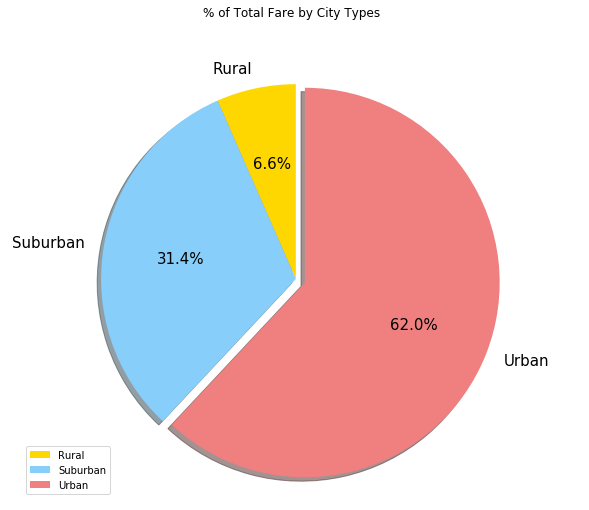

In [84]:
colors = ['Gold', 'lightskyblue' , 'lightCoral']
explode = (0, 0, 0.05)
total_fare_df.plot(kind='pie',explode=explode, figsize=(10,8),colors=colors, autopct="%1.1f%%" ,shadow=True, startangle=90,
                    subplots='True',title="% of Total Fare by City Types",fontsize=15)
plt.axis("equal")
plt.ylabel(" ")


In [85]:
#% of Total Rides by City Type
total_rides=ride_city_filemerge.groupby('type')
total_rides_df=pd.DataFrame({"Total rides by city type":total_rides['ride_id'].count()})
total_rides_df

,Total rides by city type
type,
Rural,125
Suburban,657
Urban,1625


Text(0,0.5,' ')

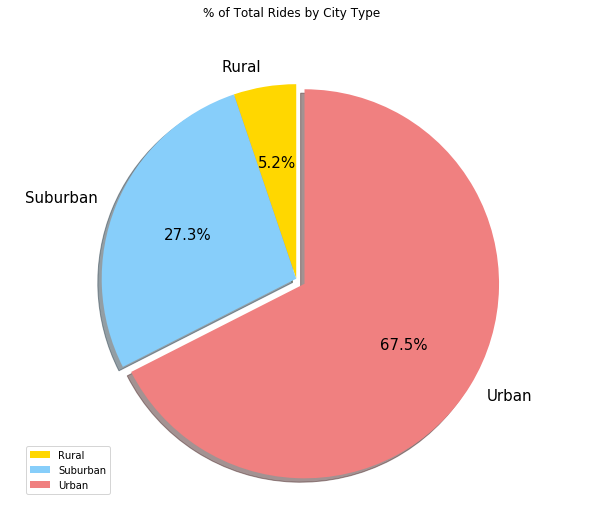

In [86]:
colors = ['Gold', 'lightskyblue' , 'lightCoral']
explode = (0, 0, 0.05)
total_rides_df.plot(kind='pie',explode=explode, figsize=(10,8),colors=colors, autopct="%1.1f%%" ,shadow=True, startangle=90,
                    subplots='True',title="% of Total Rides by City Type",fontsize=15)
plt.axis("equal")
plt.ylabel(" ")

In [87]:
#% of Total Drivers by City Type
total_drivers=rawfile_city.groupby('type')
total_drivers_df=pd.DataFrame({"Total drivers by city type":total_drivers['driver_count'].sum()})
total_drivers_df

,Total drivers by city type
type,
Rural,104
Suburban,638
Urban,2607


Text(0,0.5,' ')

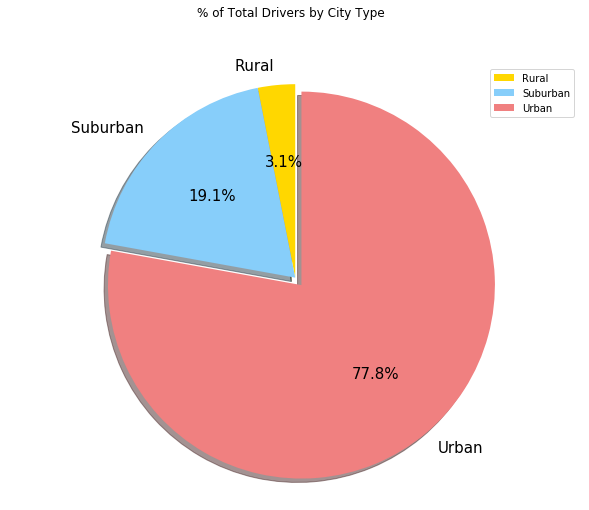

In [114]:
colors = ['Gold', 'lightskyblue' , 'lightCoral']
explode = (0, 0, 0.05)
total_drivers_df.plot(kind='pie',explode=explode, figsize=(10,8),colors=colors, autopct="%1.1f%%" ,shadow=True, startangle=90,
                    subplots='True',title="% of Total Drivers by City Type",fontsize=15)
plt.axis("equal")
plt.ylabel(" ")